# 数据说明 

In [72]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np

IMDB 数据集已经打包在 Tensorflow 中。该数据集已经经过预处理，评论（单词序列）已经被转换为整数序列，其中每个整数表示字典中的特定单词。

我们将使用来源于网络电影数据库（Internet Movie Database）的 IMDB 数据集（IMDB dataset），其包含 50,000 条影评文本。从该数据集切割出的25,000条评论用作训练，另外 25,000 条用作测试。训练集与测试集是平衡的（balanced），意味着它们包含相等数量的积极和消极评论。

In [73]:
imdb = K.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [74]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


# 词与索引的转换

In [75]:
word_index=imdb.get_word_index()

增加pad,start,unk,unused等词汇

In [76]:
word_index={k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [77]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

## 从索引到句子

In [78]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [85]:
decode_review(train_data)

"<START> begins better than it ends funny that the russian submarine crew <UNK> all other actors it's like those scenes where documentary shots br br spoiler part the message <UNK> was contrary to the whole story it just does not <UNK> br br"

In [90]:
train_data = K.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = K.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [92]:
np.save("./dataset/imdb_train_data",train_data)
np.save("./dataset/imdb_test_data",test_data)
np.save("./dataset/imdb_train_labels",train_labels)
np.save("./dataset/imdb_test_labels",test_labels)

# 测试使用

In [21]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = K.Sequential()
model.add(K.layers.Embedding(vocab_size, 16))
model.add(K.layers.GlobalAveragePooling1D())
model.add(K.layers.Dense(16, activation='relu'))
model.add(K.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 109us/sample - loss: 0.6916 - accuracy: 0.6072 - val_loss: 0.6890 - val_accuracy: 0.5897
Epoch 2/40
15000/15000 [==============================] - 1s 37us/sample - loss: 0.6841 - accuracy: 0.6676 - val_loss: 0.6792 - val_accuracy: 0.7378
Epoch 3/40
15000/15000 [==============================] - 1s 42us/sample - loss: 0.6701 - accuracy: 0.7607 - val_loss: 0.6628 - val_accuracy: 0.7558
Epoch 4/40
15000/15000 [==============================] - 1s 46us/sample - loss: 0.6475 - accuracy: 0.7798 - val_loss: 0.6376 - val_accuracy: 0.7647
Epoch 5/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6163 - accuracy: 0.7874 - val_loss: 0.6051 - val_accuracy: 0.7771
Epoch 6/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.5772 - accuracy: 0.8089 - val_loss: 0.5671 - val_accuracy: 0.8018
Epoch 7/40
15000/15000 [==============================]

In [26]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

25000/1 - 1s - loss: 0.3359 - accuracy: 0.8722
[0.32810799520492556, 0.8722]


In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

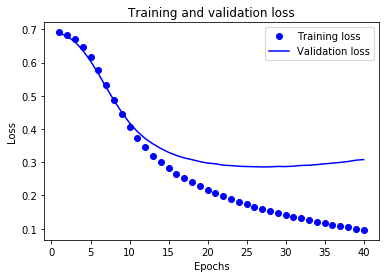

In [30]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

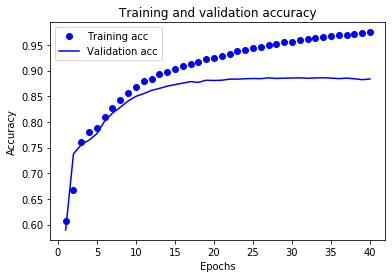

In [29]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()